In [595]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [596]:
df = pd.read_csv("Qn5_dataset.txt", sep=" ",header=None, names=['x1', 'x2','y'])
new_col=np.ones(df.shape[0])
df.insert(0, 'x0',new_col)
df

,x0,x1,x2,y
0,1.0,1.528,3.517,1
1,1.0,0.324,3.331,1
2,1.0,0.466,3.137,1
3,1.0,-1.359,2.682,1
4,1.0,-0.243,2.579,1
...,...,...,...,...
1995,1.0,-3.265,-2.280,-1
1996,1.0,-1.046,-2.569,-1
1997,1.0,-0.543,-4.239,-1
1998,1.0,-2.627,-1.088,-1


In [597]:
train = df.sample(frac=0.7, random_state=25)
test = df.drop(train.index)
print(train.shape[0])
print(test.shape[0])


1400
600


In [598]:
random.seed(10)
w=[]
for _ in range(5):
    w1=[]
    for i in range(train.shape[1]-1):
        w1.append(random.random())
    w.append(w1)
y=train['y'].tolist()
x=train.iloc[:,0:3].to_numpy()
y=np.array(y)
w=np.array(w)
w0=w
w0

array([[0.57140259, 0.42888905, 0.5780913 ],
       [0.20609823, 0.81332125, 0.82358887],
       [0.65347253, 0.16022956, 0.52066936],
       [0.32777281, 0.24999668, 0.95281691],
       [0.99655699, 0.04455638, 0.86016104]])

In [599]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [600]:
def J(w, X, y):
  return np.mean(-np.log(sigmoid(y@(w.T*x))+10**-10))

In [601]:
x

array([[ 1.   , -2.537, -2.482],
       [ 1.   , -0.847, -2.335],
       [ 1.   , -0.042, -3.086],
       ...,
       [ 1.   ,  1.263,  0.383],
       [ 1.   , -1.249,  1.882],
       [ 1.   ,  1.542,  2.284]])

In [602]:
loss=J(w[0],x,y)
loss

3.4284259689314265

In [603]:
lw=[]
i1=[]
new=[]
for a in w:
  alpha = 0.01
  # w = w - alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
  loss=[]
  l_old=0
  l=1
  it=0
  # stopping criteria l-l_old>0.001
  while(np.abs(l-l_old)>0.001):
    l_old=J(a,x, y)
    a = a + alpha * (1-sigmoid(y@(a.T*x)))*(y@x)
    l=J(a, x, y)
    it+=1
    loss.append(l)
  new.append(a)
  i1.append(it)
  lw.append(l)


    

In [604]:
w

array([[0.57140259, 0.42888905, 0.5780913 ],
       [0.20609823, 0.81332125, 0.82358887],
       [0.65347253, 0.16022956, 0.52066936],
       [0.32777281, 0.24999668, 0.95281691],
       [0.99655699, 0.04455638, 0.86016104]])

In [605]:
new

[array([-0.1972954 ,  0.42888905,  0.5780913 ]),
 array([-0.19744116,  0.81332125,  0.82358887]),
 array([-0.19967225,  0.16022956,  0.52066936]),
 array([-0.19873118,  0.24999668,  0.95281691]),
 array([-0.20023266,  0.04455638,  0.86016104])]

In [606]:
lw

[0.009427687453894018,
 0.009403330346296812,
 0.009038150616144549,
 0.009190444845770697,
 0.00894864547887743]

In [607]:
i1

[13, 11, 14, 12, 16]

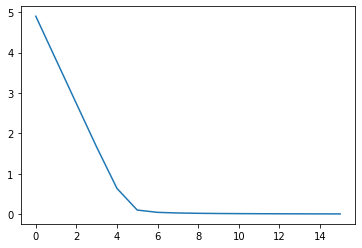

In [608]:
plt.plot(loss)

In [609]:
#prediction
w=new[2]
w0=w0[2]
yt=test['y'].tolist()
xt=test.iloc[:,0:3].to_numpy()
a=w.T*xt
p=sigmoid(a.sum(axis = 1))
p=p.round()
p[p==0]=-1


In [610]:
loss=J(w,x,y)
loss

0.009038150616144549

In [611]:
test.shape[0]

600

In [612]:
loss=0
for i in range(test.shape[0]):
    if yt[i]!=p[i]:
        loss+=1
misclassification=loss/test.shape[0]
print(misclassification)
loss

0.0016666666666666668


1

In [613]:
def x_line(w):
    return -(w[0]+w[1]*train['x1'])/w[2]

In [614]:
train0=train.loc[train['y']==-1]
# print(train0.shape[0])
train1=train.loc[train['y']==1]
# print(train1.shape[0])

In [615]:
w

array([-0.19967225,  0.16022956,  0.52066936])

In [616]:
w0

array([0.65347253, 0.16022956, 0.52066936])

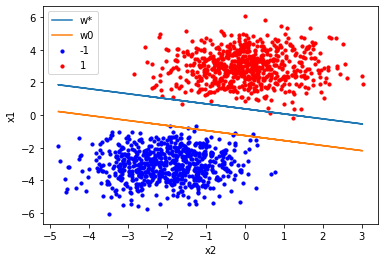

In [617]:

plt.scatter(train0['x1'], train0['x2'], s=10, c='b', marker="o", label="-1")
plt.scatter(train1['x1'], train1['x2'], s=10, c='r', marker="o", label="1")
plt.plot(train['x1'],x_line(w),label='w*')
plt.plot(train['x1'],x_line(w0),label='w0')
plt.ylabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()


In [618]:
#step size = 0.01/x
w=w0
alpha = 0.01
  # w = w - alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
loss=[]
l_old=0
l=1
it=0
  # stopping criteria l-l_old>0.001
while(np.abs(l-l_old)>0.001):
    it+=1
    alpha/=it
    l_old=J(w,x, y)
    w = w + alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
    l=J(w, x, y)
    loss.append(l)

In [619]:
l

2.066194155058089

In [620]:
it

7

In [621]:
#step size = exact line search
w=w0
# alpha = 1
  # w = w - alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
loss=[]
l_old=0
l=1
it=0
  # stopping criteria l-l_old>0.001
while(np.abs(l-l_old)>0.001):
    it+=1
    alpha=1
    l_old=J(w,x, y)
    w = w + alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
    l=J(w, x, y)
    while(l>l_old):
        alpha/=2
        w = w + alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
        l=J(w, x, y)
    loss.append(l)

In [622]:
l

-1.000000082690371e-10

In [623]:
it

2

In [624]:
w

array([-17.34638722,   0.16022956,   0.52066936])

In [625]:
w=w0
w1=w0
alpha = 0.01
  # w = w - alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
loss=[]
l_old=0
l=1
it=0
  # stopping criteria 100 iterations
while(it<100):
    it+=1
    l_old=J(w,x, y)
    w = w + alpha * (1-sigmoid(y@(w.T*x)))*(y@x)
    l=J(w, x, y)
    loss.append(l)

In [626]:
l

0.0010519670126267048

In [627]:
w

array([-0.31982793,  0.16022956,  0.52066936])